In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
from mnist import MNIST

mndata = MNIST('/home/carlosg/Carlos/ML_repo/MNIST pytorch classifier')

train_images, train_labels = mndata.load_training()
# or
test_images, test_labels = mndata.load_testing()

In [3]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

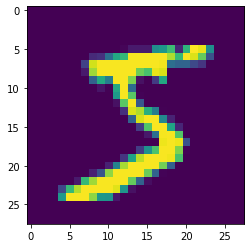

In [4]:
from matplotlib.pyplot import imshow 
imshow(np.array(train_images[0]).reshape(28,28))
# train_images[0]

In [5]:
# Model
class CACAnet(nn.Module):
    def __init__(self):
        super(CACAnet,self).__init__()
        self.lin1 = nn.Linear(784,128)
        self.act = nn.ReLU()
        self.lin2 = nn.Linear(128,10)
    
    def forward(self,x):
        x = self.lin1(x)
        x = self.act(x)
        x = self.lin2(x)
        return x


In [13]:
o = "["
for j in range(1000):
    model = CACAnet()
    # Train
    loss_funct = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters())
    # optimizer = torch.optim.SGD(model.parameters(), lr=0.001)
    BS = 128
    model.train()
    losses = []
    for i in range(100):
        samp = np.random.randint(0,train_images.shape[0], size=BS)
        X = torch.Tensor(train_images[samp]).float()
        Y = torch.Tensor(train_labels[samp]).long()
        optimizer.zero_grad()
        out = model(X)
        loss = loss_funct(out, Y) #The loss funct. does not only input the predicted output but all of the output
        losses.append(loss.item())
        predictions = torch.stack([t.max(0).indices for t in out])
        accuracy = (predictions==Y).sum().item()/BS
        loss.backward()
        optimizer.step()
    o += f"{accuracy},"
    print(f'Loss: {loss} | Test accuracy:{accuracy}')    
print(o)


Loss: 0.8090134263038635 | Test accuracy:0.84375
Loss: 0.4074217677116394 | Test accuracy:0.9140625
Loss: 0.4520958364009857 | Test accuracy:0.890625
Loss: 0.816530168056488 | Test accuracy:0.8515625
Loss: 0.7240761518478394 | Test accuracy:0.8359375
Loss: 0.5974353551864624 | Test accuracy:0.8671875
Loss: 0.49076661467552185 | Test accuracy:0.8828125
Loss: 0.6781085133552551 | Test accuracy:0.8515625
Loss: 0.3773978352546692 | Test accuracy:0.90625
Loss: 1.2469522953033447 | Test accuracy:0.796875
Loss: 0.460645854473114 | Test accuracy:0.8984375
Loss: 0.2995019257068634 | Test accuracy:0.9140625
Loss: 0.2849373519420624 | Test accuracy:0.9296875
Loss: 0.6514196991920471 | Test accuracy:0.8359375
Loss: 0.6253955960273743 | Test accuracy:0.8828125
Loss: 0.901182234287262 | Test accuracy:0.8125
Loss: 0.5167876482009888 | Test accuracy:0.890625
Loss: 0.4020078778266907 | Test accuracy:0.890625
Loss: 0.357054740190506 | Test accuracy:0.9140625
Loss: 0.5861003994941711 | Test accuracy:0.86

Loss: 0.6260603070259094 | Test accuracy:0.8828125
Loss: 0.6255030632019043 | Test accuracy:0.890625
Loss: 0.271352082490921 | Test accuracy:0.90625
Loss: 0.47710806131362915 | Test accuracy:0.90625
Loss: 0.6084061861038208 | Test accuracy:0.8515625
Loss: 0.7258080840110779 | Test accuracy:0.84375
Loss: 0.39100369811058044 | Test accuracy:0.890625
Loss: 0.7713128924369812 | Test accuracy:0.828125
Loss: 0.8703543543815613 | Test accuracy:0.875
Loss: 0.6108009815216064 | Test accuracy:0.8984375
Loss: 0.7692549228668213 | Test accuracy:0.84375
Loss: 0.7163712978363037 | Test accuracy:0.875
Loss: 0.4348313510417938 | Test accuracy:0.8828125
Loss: 0.30180099606513977 | Test accuracy:0.9140625
Loss: 0.7794150114059448 | Test accuracy:0.7890625
Loss: 0.5882176160812378 | Test accuracy:0.875
Loss: 0.28898435831069946 | Test accuracy:0.9296875
Loss: 0.5539349913597107 | Test accuracy:0.859375
Loss: 0.34950312972068787 | Test accuracy:0.890625
Loss: 0.4335774779319763 | Test accuracy:0.8671875
L

Loss: 0.6698787212371826 | Test accuracy:0.8671875
Loss: 0.4828152656555176 | Test accuracy:0.9140625
Loss: 0.5008653402328491 | Test accuracy:0.890625
Loss: 0.555408775806427 | Test accuracy:0.90625
Loss: 0.5376893877983093 | Test accuracy:0.921875
Loss: 0.5125231146812439 | Test accuracy:0.890625
Loss: 0.4478945732116699 | Test accuracy:0.8828125
Loss: 0.4633028507232666 | Test accuracy:0.8671875
Loss: 0.993526816368103 | Test accuracy:0.8671875
Loss: 0.49766039848327637 | Test accuracy:0.90625
Loss: 0.41135498881340027 | Test accuracy:0.90625
Loss: 0.3111107647418976 | Test accuracy:0.921875
Loss: 0.6733260750770569 | Test accuracy:0.890625
Loss: 0.34441420435905457 | Test accuracy:0.8984375
Loss: 0.5513524413108826 | Test accuracy:0.8984375
Loss: 0.22166560590267181 | Test accuracy:0.9296875
Loss: 0.4451746642589569 | Test accuracy:0.8984375
Loss: 0.5963225364685059 | Test accuracy:0.90625
Loss: 0.23054607212543488 | Test accuracy:0.9453125
Loss: 0.5044922828674316 | Test accuracy:

Loss: 0.6352376341819763 | Test accuracy:0.875
Loss: 0.6698299646377563 | Test accuracy:0.8984375
Loss: 0.9009353518486023 | Test accuracy:0.9375
Loss: 0.8326957821846008 | Test accuracy:0.8671875
Loss: 0.4566267430782318 | Test accuracy:0.875
Loss: 0.8400328755378723 | Test accuracy:0.859375
Loss: 0.47507739067077637 | Test accuracy:0.890625
Loss: 0.5155144333839417 | Test accuracy:0.90625
Loss: 0.3467572033405304 | Test accuracy:0.921875
Loss: 0.5346423387527466 | Test accuracy:0.875
Loss: 0.549464762210846 | Test accuracy:0.90625
Loss: 0.6065220236778259 | Test accuracy:0.8671875
Loss: 0.4228009283542633 | Test accuracy:0.875
Loss: 0.19351203739643097 | Test accuracy:0.9296875
Loss: 0.26801323890686035 | Test accuracy:0.921875
Loss: 0.5164192914962769 | Test accuracy:0.8671875
Loss: 0.6557250618934631 | Test accuracy:0.84375
Loss: 0.42500531673431396 | Test accuracy:0.921875
Loss: 0.7116982936859131 | Test accuracy:0.859375
Loss: 0.42844459414482117 | Test accuracy:0.875
Loss: 0.564

Loss: 0.28882238268852234 | Test accuracy:0.921875
Loss: 0.5387411713600159 | Test accuracy:0.890625
Loss: 0.38883090019226074 | Test accuracy:0.8984375
Loss: 0.38953471183776855 | Test accuracy:0.890625
Loss: 0.3403436541557312 | Test accuracy:0.953125
Loss: 0.3291221857070923 | Test accuracy:0.90625
Loss: 0.4722444713115692 | Test accuracy:0.9140625
Loss: 0.6991769671440125 | Test accuracy:0.8671875
Loss: 0.5441806316375732 | Test accuracy:0.8671875
Loss: 0.5750578045845032 | Test accuracy:0.9140625
Loss: 0.3343521058559418 | Test accuracy:0.90625
Loss: 0.5084065198898315 | Test accuracy:0.9140625
Loss: 0.8278695344924927 | Test accuracy:0.8203125
Loss: 0.47552037239074707 | Test accuracy:0.8984375
Loss: 0.5326145887374878 | Test accuracy:0.921875
Loss: 0.6720098853111267 | Test accuracy:0.859375
Loss: 0.2406795471906662 | Test accuracy:0.9296875
Loss: 0.6074166297912598 | Test accuracy:0.8984375
Loss: 0.4345034062862396 | Test accuracy:0.9375
Loss: 0.6012837886810303 | Test accuracy

Loss: 0.48145368695259094 | Test accuracy:0.90625
Loss: 0.43281102180480957 | Test accuracy:0.890625
Loss: 0.5201524496078491 | Test accuracy:0.859375
Loss: 0.21856647729873657 | Test accuracy:0.9296875
Loss: 0.40536534786224365 | Test accuracy:0.9140625
Loss: 0.45246732234954834 | Test accuracy:0.921875
Loss: 0.39320939779281616 | Test accuracy:0.90625
Loss: 0.9344711899757385 | Test accuracy:0.875
Loss: 0.6053470373153687 | Test accuracy:0.8828125
Loss: 0.3455859422683716 | Test accuracy:0.8984375
Loss: 0.5292630195617676 | Test accuracy:0.8671875
Loss: 0.41378071904182434 | Test accuracy:0.8984375
Loss: 0.3725956678390503 | Test accuracy:0.8984375
Loss: 0.7500852942466736 | Test accuracy:0.8828125
Loss: 0.7695391774177551 | Test accuracy:0.875
Loss: 0.8024904727935791 | Test accuracy:0.84375
Loss: 0.6616105437278748 | Test accuracy:0.859375
Loss: 0.46802040934562683 | Test accuracy:0.8671875
Loss: 0.5677513480186462 | Test accuracy:0.921875
Loss: 0.5514869689941406 | Test accuracy:0

Loss: 0.5349637269973755 | Test accuracy:0.9140625
Loss: 0.4664097726345062 | Test accuracy:0.8671875
Loss: 0.4259800612926483 | Test accuracy:0.8984375
Loss: 0.722621500492096 | Test accuracy:0.90625
Loss: 0.7406988739967346 | Test accuracy:0.90625
Loss: 0.30110493302345276 | Test accuracy:0.8984375
Loss: 0.6431509852409363 | Test accuracy:0.890625
Loss: 0.2967701256275177 | Test accuracy:0.9296875
Loss: 0.4720095992088318 | Test accuracy:0.8984375
Loss: 0.2223152369260788 | Test accuracy:0.9375
Loss: 0.6091734170913696 | Test accuracy:0.8515625
Loss: 0.5007520914077759 | Test accuracy:0.9140625
Loss: 0.31652578711509705 | Test accuracy:0.9375
Loss: 0.9688374400138855 | Test accuracy:0.859375
Loss: 0.3812929093837738 | Test accuracy:0.9296875
Loss: 0.40463683009147644 | Test accuracy:0.953125
Loss: 0.48310723900794983 | Test accuracy:0.8828125
[0.84375,0.9140625,0.890625,0.8515625,0.8359375,0.8671875,0.8828125,0.8515625,0.90625,0.796875,0.8984375,0.9140625,0.9296875,0.8359375,0.882812

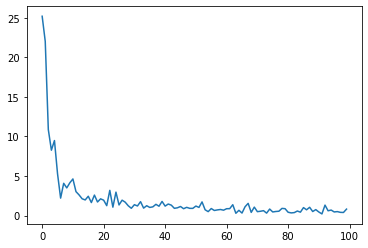

In [7]:
plt.plot(losses)

In [11]:
# Eval
model.eval()
X = torch.Tensor(test_images).float()
Y = torch.Tensor(test_labels).long()
out = model(X)
predictions = torch.stack([t.max(0).indices for t in out])
accuracy = (predictions==Y).sum().item()/Y.shape[0]
print(f'Eval. accuracy:{accuracy}')  

Eval. accuracy:0.8818


In [14]:
acc1000 = [0.84375,0.9140625,0.890625,0.8515625,0.8359375,0.8671875,0.8828125,0.8515625,0.90625,0.796875,0.8984375,0.9140625,0.9296875,0.8359375,0.8828125,0.8125,0.890625,0.890625,0.9140625,0.8671875,0.8203125,0.8828125,0.8984375,0.875,0.84375,0.875,0.90625,0.859375,0.828125,0.9453125,0.8828125,0.8828125,0.875,0.8828125,0.921875,0.8671875,0.875,0.890625,0.90625,0.921875,0.9375,0.875,0.8984375,0.8671875,0.8671875,0.8984375,0.90625,0.9140625,0.84375,0.859375,0.8828125,0.890625,0.890625,0.875,0.8984375,0.8515625,0.8515625,0.890625,0.90625,0.9375,0.8359375,0.8828125,0.90625,0.8671875,0.875,0.8984375,0.8828125,0.90625,0.9140625,0.890625,0.8515625,0.890625,0.890625,0.90625,0.8984375,0.8671875,0.90625,0.890625,0.890625,0.859375,0.953125,0.8828125,0.90625,0.8984375,0.875,0.859375,0.875,0.8984375,0.8984375,0.890625,0.9296875,0.8984375,0.875,0.890625,0.7890625,0.84375,0.8671875,0.9296875,0.8984375,0.8984375,0.9140625,0.8515625,0.8671875,0.859375,0.921875,0.8671875,0.875,0.90625,0.9296875,0.890625,0.828125,0.921875,0.9296875,0.890625,0.890625,0.9140625,0.8984375,0.9140625,0.859375,0.8515625,0.8359375,0.8359375,0.875,0.8984375,0.8671875,0.8828125,0.8984375,0.8828125,0.8984375,0.8671875,0.90625,0.90625,0.875,0.8828125,0.921875,0.8671875,0.90625,0.8515625,0.8828125,0.8671875,0.9453125,0.8828125,0.9140625,0.90625,0.90625,0.8828125,0.90625,0.90625,0.84375,0.8984375,0.9375,0.8359375,0.8828125,0.8671875,0.890625,0.8671875,0.8984375,0.8671875,0.8828125,0.8828125,0.8515625,0.8984375,0.9296875,0.8984375,0.8828125,0.890625,0.90625,0.90625,0.8515625,0.84375,0.890625,0.828125,0.875,0.8984375,0.84375,0.875,0.8828125,0.9140625,0.7890625,0.875,0.9296875,0.859375,0.890625,0.8671875,0.8984375,0.8515625,0.890625,0.828125,0.90625,0.8828125,0.859375,0.84375,0.8984375,0.890625,0.875,0.8984375,0.8828125,0.875,0.8984375,0.890625,0.875,0.8671875,0.9140625,0.90625,0.8828125,0.859375,0.9140625,0.8671875,0.8828125,0.8984375,0.875,0.875,0.8671875,0.8984375,0.8984375,0.953125,0.9296875,0.8828125,0.9375,0.8828125,0.859375,0.8984375,0.8671875,0.8828125,0.875,0.8515625,0.875,0.859375,0.8515625,0.890625,0.875,0.859375,0.90625,0.9140625,0.8828125,0.859375,0.859375,0.890625,0.8828125,0.921875,0.8671875,0.8828125,0.8125,0.84375,0.8984375,0.84375,0.875,0.90625,0.90625,0.84375,0.9296875,0.8828125,0.8828125,0.8984375,0.8984375,0.90625,0.859375,0.8984375,0.921875,0.8359375,0.9453125,0.859375,0.9375,0.9140625,0.84375,0.8828125,0.9140625,0.9296875,0.875,0.8828125,0.9140625,0.875,0.8359375,0.890625,0.8984375,0.921875,0.8125,0.875,0.9140625,0.8984375,0.8828125,0.9140625,0.90625,0.90625,0.890625,0.8515625,0.9140625,0.8828125,0.8515625,0.8984375,0.8984375,0.8515625,0.875,0.9296875,0.8671875,0.8515625,0.8359375,0.8359375,0.890625,0.8828125,0.8984375,0.875,0.8984375,0.90625,0.9609375,0.8671875,0.875,0.890625,0.8984375,0.890625,0.890625,0.8359375,0.90625,0.8125,0.8125,0.8359375,0.8671875,0.875,0.90625,0.921875,0.9296875,0.875,0.9296875,0.8671875,0.875,0.8203125,0.890625,0.8984375,0.8671875,0.9140625,0.890625,0.90625,0.921875,0.890625,0.8828125,0.8671875,0.8671875,0.90625,0.90625,0.921875,0.890625,0.8984375,0.8984375,0.9296875,0.8984375,0.90625,0.9453125,0.875,0.875,0.8515625,0.8828125,0.8828125,0.8671875,0.859375,0.8828125,0.859375,0.859375,0.890625,0.9296875,0.890625,0.8828125,0.8515625,0.890625,0.875,0.9140625,0.859375,0.8359375,0.8984375,0.875,0.84375,0.8125,0.90625,0.890625,0.875,0.9140625,0.90625,0.875,0.890625,0.8984375,0.859375,0.90625,0.8828125,0.9140625,0.8828125,0.921875,0.9140625,0.890625,0.890625,0.9140625,0.875,0.890625,0.875,0.8984375,0.90625,0.875,0.90625,0.8984375,0.890625,0.8828125,0.875,0.9296875,0.859375,0.8984375,0.9140625,0.90625,0.9453125,0.8984375,0.921875,0.859375,0.890625,0.84375,0.9140625,0.921875,0.890625,0.8671875,0.890625,0.859375,0.875,0.8984375,0.90625,0.84375,0.890625,0.8828125,0.8359375,0.9140625,0.8984375,0.921875,0.875,0.875,0.90625,0.8984375,0.8984375,0.875,0.875,0.875,0.9140625,0.8828125,0.90625,0.859375,0.8828125,0.8671875,0.9140625,0.890625,0.8828125,0.921875,0.8359375,0.8515625,0.8984375,0.90625,0.890625,0.8359375,0.8984375,0.890625,0.859375,0.8515625,0.8125,0.890625,0.890625,0.84375,0.8671875,0.890625,0.8828125,0.8828125,0.8984375,0.875,0.9453125,0.8984375,0.8984375,0.9140625,0.84375,0.8515625,0.9296875,0.875,0.84375,0.921875,0.9296875,0.9296875,0.921875,0.875,0.875,0.875,0.859375,0.8515625,0.8828125,0.8984375,0.875,0.8671875,0.9140625,0.8515625,0.8984375,0.9296875,0.890625,0.875,0.8984375,0.9375,0.8671875,0.875,0.859375,0.890625,0.90625,0.921875,0.875,0.90625,0.8671875,0.875,0.9296875,0.921875,0.8671875,0.84375,0.921875,0.859375,0.875,0.8515625,0.890625,0.875,0.8984375,0.921875,0.90625,0.8515625,0.875,0.9140625,0.9140625,0.84375,0.8984375,0.8515625,0.9453125,0.875,0.8046875,0.90625,0.8671875,0.90625,0.90625,0.90625,0.8828125,0.9453125,0.859375,0.84375,0.8359375,0.8984375,0.8984375,0.921875,0.859375,0.90625,0.8515625,0.90625,0.8828125,0.8515625,0.890625,0.859375,0.9375,0.828125,0.921875,0.875,0.8515625,0.828125,0.9375,0.8984375,0.8984375,0.9140625,0.859375,0.8515625,0.8828125,0.8984375,0.9296875,0.90625,0.8828125,0.921875,0.8984375,0.890625,0.890625,0.8828125,0.90625,0.9140625,0.875,0.890625,0.828125,0.890625,0.8984375,0.8984375,0.890625,0.8984375,0.9140625,0.8671875,0.859375,0.8515625,0.921875,0.9375,0.9140625,0.90625,0.921875,0.8984375,0.921875,0.859375,0.90625,0.875,0.8984375,0.9375,0.9375,0.9296875,0.84375,0.859375,0.828125,0.8359375,0.9375,0.828125,0.890625,0.953125,0.8828125,0.8828125,0.8515625,0.84375,0.8515625,0.8828125,0.9296875,0.9140625,0.8515625,0.9140625,0.921875,0.8671875,0.875,0.8984375,0.8515625,0.921875,0.9375,0.90625,0.859375,0.84375,0.8671875,0.875,0.9140625,0.8984375,0.90625,0.890625,0.8203125,0.90625,0.8984375,0.859375,0.8515625,0.9375,0.8671875,0.921875,0.921875,0.8671875,0.9140625,0.875,0.8359375,0.9296875,0.84375,0.8984375,0.9296875,0.8828125,0.8984375,0.9140625,0.890625,0.8984375,0.875,0.921875,0.890625,0.8984375,0.890625,0.953125,0.90625,0.9140625,0.8671875,0.8671875,0.9140625,0.90625,0.9140625,0.8203125,0.8984375,0.921875,0.859375,0.9296875,0.8984375,0.9375,0.9375,0.9140625,0.859375,0.8671875,0.8828125,0.8828125,0.8671875,0.890625,0.890625,0.8984375,0.8671875,0.890625,0.859375,0.90625,0.875,0.875,0.890625,0.875,0.890625,0.7890625,0.875,0.8515625,0.890625,0.8515625,0.859375,0.8984375,0.828125,0.8984375,0.8359375,0.84375,0.9296875,0.84375,0.9140625,0.875,0.875,0.8984375,0.890625,0.8671875,0.8828125,0.90625,0.8984375,0.9296875,0.8671875,0.8828125,0.8828125,0.84375,0.8828125,0.8828125,0.90625,0.875,0.9296875,0.8984375,0.8515625,0.9375,0.8984375,0.859375,0.8515625,0.859375,0.890625,0.8828125,0.8984375,0.8828125,0.875,0.84375,0.9296875,0.8671875,0.8203125,0.90625,0.8828125,0.90625,0.8828125,0.890625,0.8984375,0.8671875,0.90625,0.90625,0.8203125,0.859375,0.8828125,0.8671875,0.90625,0.875,0.8515625,0.8984375,0.875,0.90625,0.859375,0.9375,0.9453125,0.921875,0.8984375,0.921875,0.8828125,0.890625,0.9140625,0.890625,0.8671875,0.875,0.9296875,0.9453125,0.9296875,0.8984375,0.890625,0.8828125,0.9140625,0.9140625,0.875,0.90625,0.8671875,0.8515625,0.859375,0.8984375,0.890625,0.921875,0.8671875,0.890625,0.8671875,0.8984375,0.8828125,0.921875,0.9296875,0.890625,0.8828125,0.8984375,0.8984375,0.9140625,0.890625,0.8515625,0.875,0.90625,0.921875,0.90625,0.8671875,0.859375,0.8515625,0.90625,0.8125,0.8515625,0.90625,0.859375,0.875,0.90625,0.875,0.859375,0.8359375,0.90625,0.890625,0.859375,0.9296875,0.9140625,0.921875,0.90625,0.875,0.8828125,0.8984375,0.8671875,0.8984375,0.8984375,0.8828125,0.875,0.84375,0.859375,0.8671875,0.921875,0.8515625,0.9296875,0.8828125,0.8671875,0.859375,0.8828125,0.9296875,0.9140625,0.9140625,0.8671875,0.8828125,0.8828125,0.8828125,0.828125,0.890625,0.90625,0.875,0.8671875,0.8125,0.9140625,0.9296875,0.8125,0.875,0.8984375,0.7734375,0.8671875,0.8984375,0.8671875,0.84375,0.875,0.8828125,0.8828125,0.8828125,0.90625,0.921875,0.8515625,0.90625,0.859375,0.921875,0.890625,0.8359375,0.8984375,0.9140625,0.8984375,0.859375,0.921875,0.8828125,0.9140625,0.8671875,0.953125,0.9296875,0.8828125,0.890625,0.921875,0.8671875,0.8984375,0.875,0.8828125,0.890625,0.875,0.8828125,0.890625,0.9375,0.890625,0.9375,0.90625,0.8828125,0.8515625,0.890625,0.8828125,0.90625,0.8984375,0.9140625,0.84375,0.8984375,0.859375,0.8515625,0.875,0.859375,0.875,0.828125,0.8359375,0.8828125,0.875,0.890625,0.9140625,0.8671875,0.8828125,0.9140625,0.890625,0.921875,0.8671875,0.8671875,0.921875,0.8828125,0.859375,0.8984375,0.9375,0.8671875,0.8359375,0.8359375,0.828125,0.890625,0.890625,0.859375,0.875,0.90625,0.890625,0.9453125,0.8515625,0.875,0.90625,0.8671875,0.90625,0.8828125,0.8671875,0.921875,0.9453125,0.8984375,0.8515625,0.890625,0.8515625,0.90625,0.921875,0.8515625,0.9296875,0.9140625,0.8515625,0.8828125,0.875,0.8671875,0.8671875,0.8828125,0.8984375,0.9140625,0.9296875,0.9140625,0.8828125,0.8515625,0.8828125,0.9296875,0.8515625,0.8671875,0.90625,0.9140625,0.8671875,0.8984375,0.90625,0.90625,0.8984375,0.890625,0.9296875,0.8984375,0.9375,0.8515625,0.9140625,0.9375,0.859375,0.9296875,0.953125,0.8828125]